# Assignment 2

Alberto Monaco s1043826
Edoardo Gervasoni s1043824

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


### Answer to question 2.1.1a

1) Load the data

In [1]:
import scipy.io as sio
import scipy.stats as st

In [2]:
data = sio.loadmat("Data/wine.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Feb 20 16:44:10 2014',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
        [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
        [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
        ...,
        [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
        [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
        [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]]),
 'attributeNames': array([[array(['Fixed acidity'], dtype='<U13'),
         array(['Volatile acidity'], dtype='<U16'),
         array(['Citric acid'], dtype='<U11'),
         array(['Residual sugar'], dtype='<U14'),
         array(['Chlorides'], dtype='<U9'),
         array(['Free sulfur dioxide'], dtype='<U19'),
         array(['Total sulfur dioxide'], dtype='<U20'),
         array(['Density'], dtype='<U7'), array(['pH'], dtype='<U2'),
         array(['Sulphates'], dtype='<U9'),
         array

2) Boxplot and histogram for each attribute

Import needed libraries 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Standardizing variables before plot boxplots and histograms.

In [4]:
data_stand = st.zscore(data['X'])

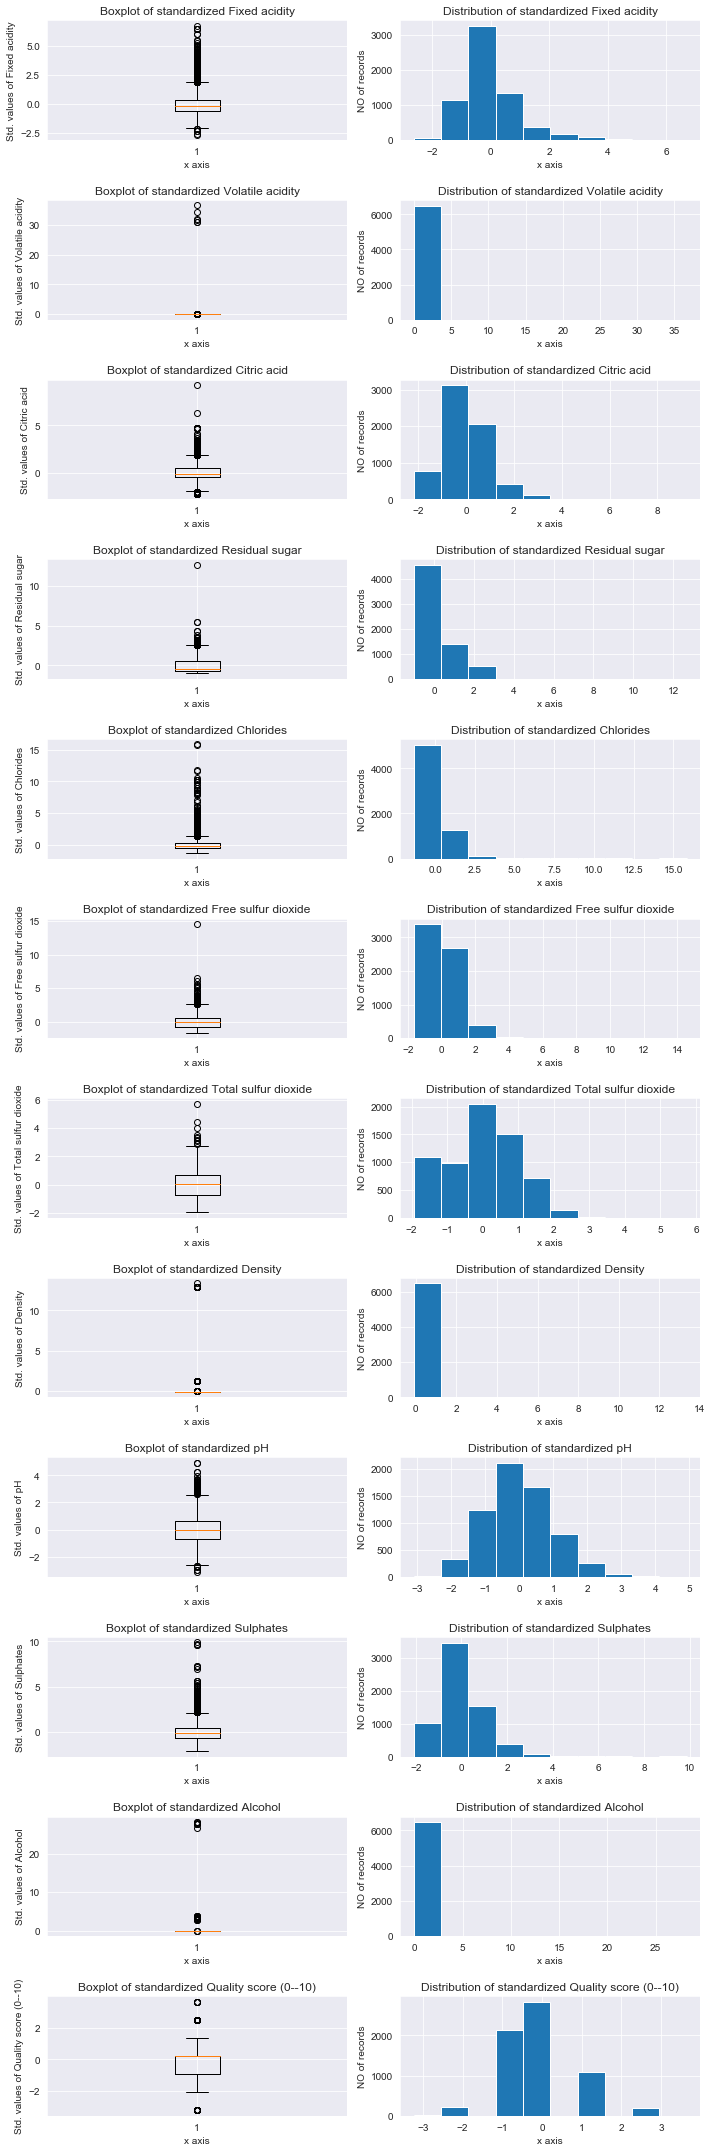

Figure 1: Boxplot and histogram for each attribute


In [5]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(12,2,figsize=(10,30))# create 12 rows of 2 columns of subplots
ax = ax.flatten()
for i in range(0,12):
    name = str(data['attributeNames'][0,i])[2:-2]   #to remove first and last 2 characters from attribute name
    ax[2*i].boxplot(data_stand[:,i])
    ax[2*i].set_title(f'Boxplot of standardized {name}')
    ax[2*i].set_xlabel('x axis')
    ax[2*i].set_ylabel(f'Std. values of {name}')
    
    ax[2*i+1].hist(data_stand[:,i])
    ax[2*i+1].set_title(f'Distribution of standardized {name}')
    ax[2*i+1].set_xlabel('x axis')
    ax[2*i+1].set_ylabel(f'NO of records')
plt.tight_layout()
plt.show()
print('Figure 1: Boxplot and histogram for each attribute')

3) Detecting outliers for *Volatile acidity*, *Density* and *Alcohol percentage*, and removing them from the **original** data.

First we remove records with *Volatile acidity* higher than 20 (10 times greater then the larger expected value).

In [6]:
X_filtered = data['X']         
X_filtered = X_filtered[X_filtered[:,1] <= 20]

In [7]:
X_filtered.shape

(6491, 12)

Same approach for *Density*; here the upper bound is 10 g/cm3

In [8]:
X_filtered = X_filtered[X_filtered[:,7] <= 10]

Control

In [9]:
X_filtered[:,7 > 10]

array([], shape=(6344, 0, 12), dtype=float64)

In [10]:
X_filtered.shape

(6344, 12)

For the feature *Alcohol percentage* we are going to consider as outliers only records with not phisically possible values, i.e. more than 100%.

In [11]:
X_filtered = X_filtered[X_filtered[:,10] <= 100]

Control

In [12]:
X_filtered[:,10 > 100]

array([], shape=(6304, 0, 12), dtype=float64)

In [13]:
X_filtered.shape

(6304, 12)

4) Boxplots and histograms of the new attributes.

After the elimination of outliers, we stardardize the new filtered data.

In [14]:
data_filt_stand = st.zscore(X_filtered)

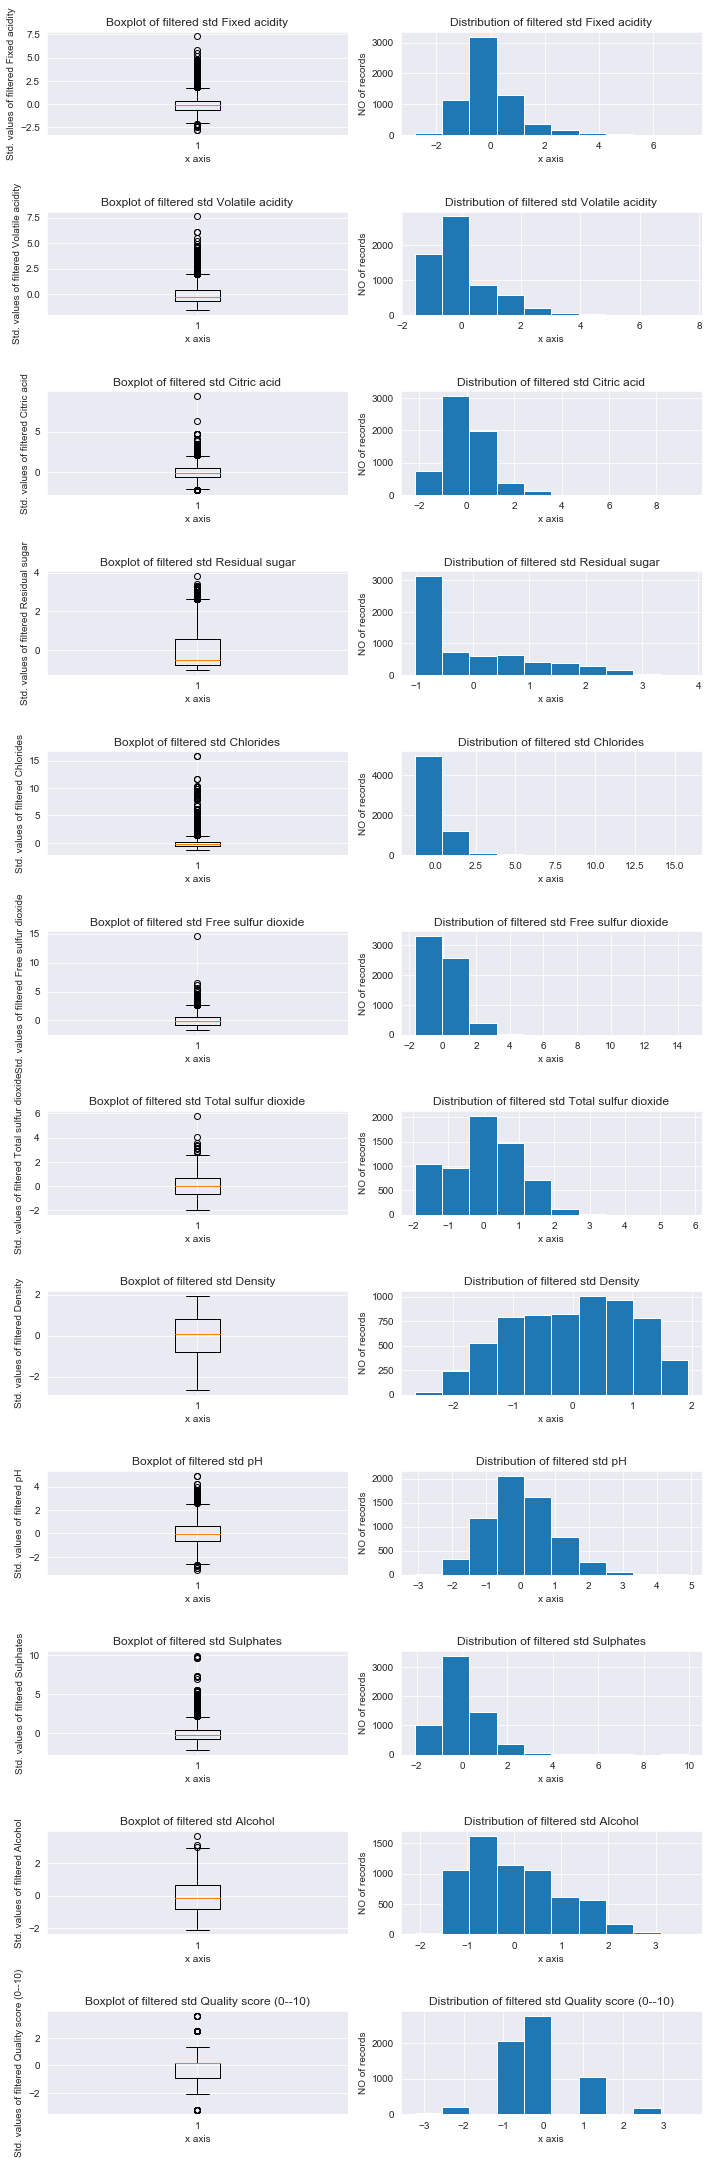

Figure 2: Boxplot and histogram for each attribute after the elimination of outliers


In [15]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(12,2,figsize=(10,30))
ax = ax.flatten()
for i in range(0,12):
    name = str(data['attributeNames'][0,i])[2:-2]
    ax[2*i].boxplot(data_filt_stand[:,i])
    ax[2*i].set_title(f'Boxplot of filtered std {name}')
    ax[2*i].set_xlabel('x axis')
    ax[2*i].set_ylabel(f'Std. values of filtered {name}')
    
    ax[2*i+1].hist(data_filt_stand[:,i])
    ax[2*i+1].set_title(f'Distribution of filtered std {name}')
    ax[2*i+1].set_xlabel('x axis')
    ax[2*i+1].set_ylabel(f'NO of records')
plt.tight_layout()
plt.show()
print('Figure 2: Boxplot and histogram for each attribute after the elimination of outliers')

### Considerations about the new plots

As we can see from the new plots, for all of the variables, the elimination of outliers allows us to see better the distribution of the records lying around the 0 value. This results is achieved in both boxplots and histograms. 
(From the first visualizations the histogram of *Volatile acidity* and *Density* showed only one bar containing all of the values,
while in the last graphs is represented the entire distribution of these variables).
Anyway, from the boxplot of the *Volatile acidity* variable we can still see some outliers (points lying over the whisker of the graph), while *Density* shows no more of them.
The *Alcoholic percentage* boxplot has now only few values over the whisker. For this attribute we didn't have any values properly considered outliers, i.e. with *Alcoholic percentage* greather than 100%; however, rows removal carried out considering *Density* and *Volatile acidity* outliers, has resulted in a new boxplot representation.

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

### Answer to question 2.1.1b

We need to standardize the data after removing the outliers because these observations heavly influence the mean of the data, 
significantly modifying standardization. In fact,
$$ X_{standardized} = \frac{X - \mu}{\sigma} $$ where $ \mu $, which is the mean, takes considerably different values in the presence or absence of outliers.

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

### Answer to question 2.1.2

For question 2.1.2 we chose to utilize filtered data (as requested) but not standardized, in order to mantain *Quality Score* values unchanged.

In [16]:
X_filtered[:,11]

array([5., 5., 5., ..., 6., 7., 6.])

Scatterplots between features and wine quality

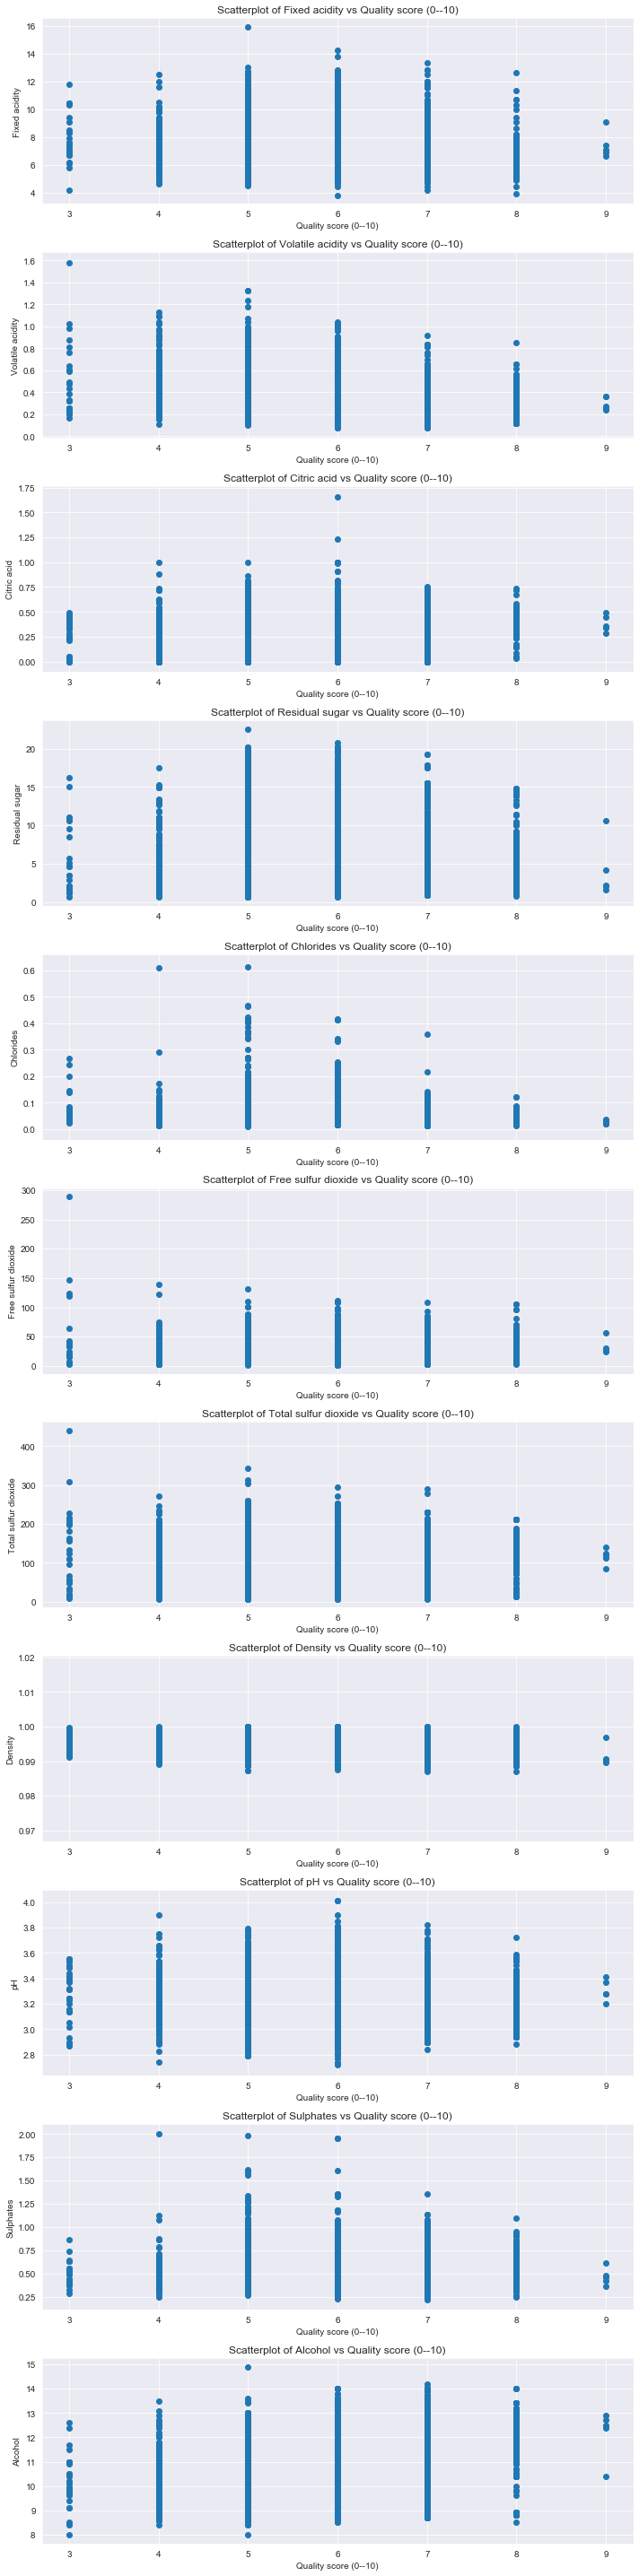

Figure 3: Comparing attributes with wine quality as rated by human judges


In [17]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(11,1,figsize=(10,40))# create 12 rows of 2 columns of subplots
ax = ax.flatten()
for i in range(0,11):
    name = str(data['attributeNames'][0,i])[2:-2]   #to remove first and last 2 characters from attribute name
    ax[i].scatter(X_filtered[:,11],X_filtered[:,i])
    ax[i].set_title(f'Scatterplot of {name} vs Quality score (0--10)')
    ax[i].set_xlabel('Quality score (0--10)')
    ax[i].set_ylabel(f'{name}')
    
plt.tight_layout()
plt.show()
print('Figure 3: Comparing attributes with wine quality as rated by human judges')

As we can see from the graphs above, the data don't show a particular pattern. Moreover, the correlation between each attribute with the class variable wine quality seems to be low. Anyway, we can visually identify some relationship between some of the features and wine quality. In particular we can see from the scatterplots that low values of *Volatile acidity* and *Chlorides* are associated with high quality wine, such as higher values of the attribute *Alcohol*. 

Correlation coefficients:

In [18]:
for i in range(0,11):
    name = str(data['attributeNames'][0,i])[2:-2]
    coef = st.pearsonr(X_filtered[:,11],X_filtered[:,i])
    print(f'Corr. coeff. between {name} and Quality:   {coef}\n')

Corr. coeff. between Fixed acidity and Quality:   (-0.07668526520453652, 1.0847899728777514e-09)

Corr. coeff. between Volatile acidity and Quality:   (-0.26230590578350776, 1.0724803118587711e-99)

Corr. coeff. between Citric acid and Quality:   (0.0890221181546118, 1.4330992086587045e-12)

Corr. coeff. between Residual sugar and Quality:   (-0.03215392730963386, 0.010676798571678045)

Corr. coeff. between Chlorides and Quality:   (-0.19914164479762572, 2.1198960802505528e-57)

Corr. coeff. between Free sulfur dioxide and Quality:   (0.05516006485585848, 1.1756681578183794e-05)

Corr. coeff. between Total sulfur dioxide and Quality:   (-0.03971034037910721, 0.0016130889003013028)

Corr. coeff. between Density and Quality:   (-0.3196176972872714, 1.0807901465291248e-149)

Corr. coeff. between pH and Quality:   (0.02030807915814118, 0.10690494956698367)

Corr. coeff. between Sulphates and Quality:   (0.03798453783414721, 0.002558152972937331)

Corr. coeff. between Alcohol and Quality:  

The correlation coefficients seem to confirm our hypothesis. 
In fact for *Volatile acidity* and *Chlorides* the coefficients are negative (-0.262 and -0.199 respectively), while for *Alcohol* we have a positive value (0.449). Furthermore we can see a negative correlation between *Density* and *Quality score* (corr. coeff. of -0.319) which is not clearly identifiable in the scatter plot.

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


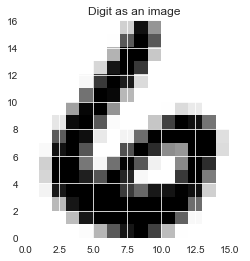

In [19]:
## Example code:
#------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape

# Index of the digit to display
i = 0

# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]

# Visualize the i'th digit as an image
plt.subplot(1,1,1);
I = reshape(X[i,:],(16,16))
plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
plt.title('Digit as an image');
plt.show()
#------------------------------------------------

### Answer to question 2.2.1

1) Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: testdata and traindata. Here, we will only use traindata. The first column in the matrix traindata contains the digit (class) and the last 256 columns contain the pixel values.

In [20]:
mat_data = loadmat('./Data/zipdata.mat')
traindata = mat_data['traindata']

2) Create the data matrix X and the class index vector y from the data. Remove the digits with the class index 2-9 from the data, so only digits belonging to the class 0 and 1 are analyzed. (remember logical indexing!)

In [21]:
X = traindata[:,1:][traindata[:,0] <= 1]
y = traindata[:,0][traindata[:,0] <= 1]

Now the class vector has only 0 and 1 values.

In [22]:
np.unique(y)

array([0., 1.])

3) Visualize the first 10 digits as images. (take a look at the example code) Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix  𝑍  by projecting  𝑋  onto the space spanned by the loadings  𝑉 . The new data matrix should have 4 attributes corresponding to PC1-PC4. Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.

Visualize the first 10 digits as image

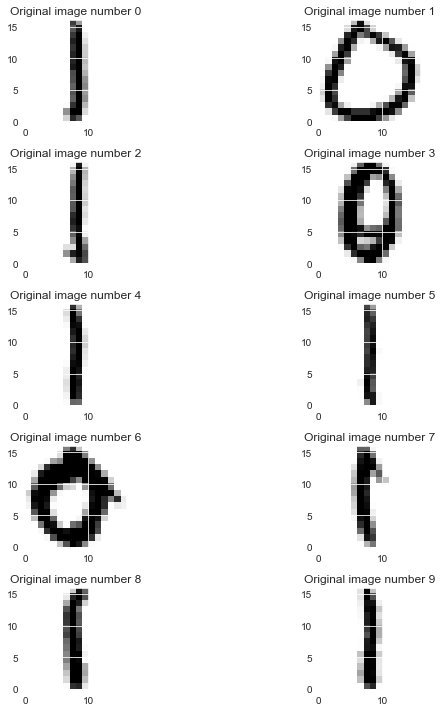

Figure 4: First 10 digits


In [23]:
fig,ax = plt.subplots(5,2,figsize=(10,10))
ax = ax.flatten()
for i in range(0,10):
    I = reshape(X[i,:],(16,16))
    ax[i].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    ax[i].set_title(f'Original image number {i}')
plt.tight_layout()
plt.show()
print('Figure 4: First 10 digits')

PCA on the data matrix. 

First we are going to centered data:

In [24]:
import numpy as np
Xc = np.zeros((2199,256)) #2199x256 matrix with only 0s
mu = []
for i in range(0,256):
    m = np.mean(X[:,i])
    Xc[:,i] = X[:,i] - m  # Y = X - mean
    
Xc[:10,:]    #First 10 rows

array([[-7.44884038e-04, -2.49886312e-03, -8.18644839e-03, ...,
        -2.10050023e-03, -3.45611642e-05,  0.00000000e+00],
       [-7.44884038e-04, -2.49886312e-03, -8.18644839e-03, ...,
        -2.10050023e-03, -3.45611642e-05,  0.00000000e+00],
       [-7.44884038e-04, -2.49886312e-03, -8.18644839e-03, ...,
        -2.10050023e-03, -3.45611642e-05,  0.00000000e+00],
       ...,
       [-7.44884038e-04, -2.49886312e-03, -8.18644839e-03, ...,
        -2.10050023e-03, -3.45611642e-05,  0.00000000e+00],
       [-7.44884038e-04, -2.49886312e-03, -8.18644839e-03, ...,
        -2.10050023e-03, -3.45611642e-05,  0.00000000e+00],
       [-7.44884038e-04, -2.49886312e-03, -8.18644839e-03, ...,
        -2.10050023e-03, -3.45611642e-05,  0.00000000e+00]])

Singular Value Decomposition, carried out through numpy function.

In [25]:
u, s, vt = np.linalg.svd(Xc)
print(u,'\n', u.shape,'\n\n\n', s,'\n', s.shape,'\n\n\n', vt,'\n', vt.shape)

[[-2.21207093e-02  5.42133742e-03 -9.06867188e-03 ... -7.11270280e-04
  -8.38174744e-04 -3.70025871e-03]
 [ 1.67375980e-02  3.49841141e-02 -1.93414288e-02 ... -3.46884244e-03
  -1.28712323e-03 -2.28302260e-03]
 [-2.06434238e-02  5.66605154e-03 -1.41816610e-02 ... -3.93915527e-03
   2.42787426e-03 -1.27928594e-03]
 ...
 [-2.29234028e-02  4.45447652e-04  1.10162419e-02 ...  9.77671369e-01
  -8.89537555e-05 -1.45247183e-03]
 [ 3.21955096e-02 -8.91615621e-03  5.66259552e-02 ...  6.33686058e-04
   7.08667796e-01  5.43532456e-03]
 [-1.88007228e-02 -1.69994358e-02  4.64162745e-02 ... -2.40558948e-03
   1.06697280e-02  9.39711511e-01]] 
 (2199, 2199) 


 [3.48272441e+02 1.84314984e+02 1.26495613e+02 9.34146308e+01
 8.67468286e+01 8.21735273e+01 7.38098164e+01 6.01607102e+01
 5.67703165e+01 5.43044052e+01 5.16585307e+01 5.00576890e+01
 4.46304752e+01 4.27441772e+01 4.09767677e+01 3.90839515e+01
 3.69903351e+01 3.56836588e+01 3.44311918e+01 3.34582676e+01
 3.30626049e+01 3.07620336e+01 2.9663052

Projection of the data in the matrix Z and selection of the first 4 PCs

Projected data

In [26]:
Z = np.dot(Xc, vt.transpose())

First 4 PCs

In [27]:
Z = Z[:,0:4]

Once achieved the matrix Z containing the first 4 PCs, in the next point we are going to show the images of original data and their reconstructed counterparts, compairing them.

4) Reconstruct the initial data using PC1-PC4 into a new matrix called  𝑊 . Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.

In [28]:
mu = []
for i in range(0,256):
    m = np.mean(X[:,i])
    mu.append(m)

W = np.dot(Z, vt[:4,:]) + mu

In [29]:
W.shape

(2199, 256)

In [30]:
Z.shape

(2199, 4)

In [31]:
X.shape

(2199, 256)

Plot of the first 10 digits and their reconstructed counterparts in an orderly manner.

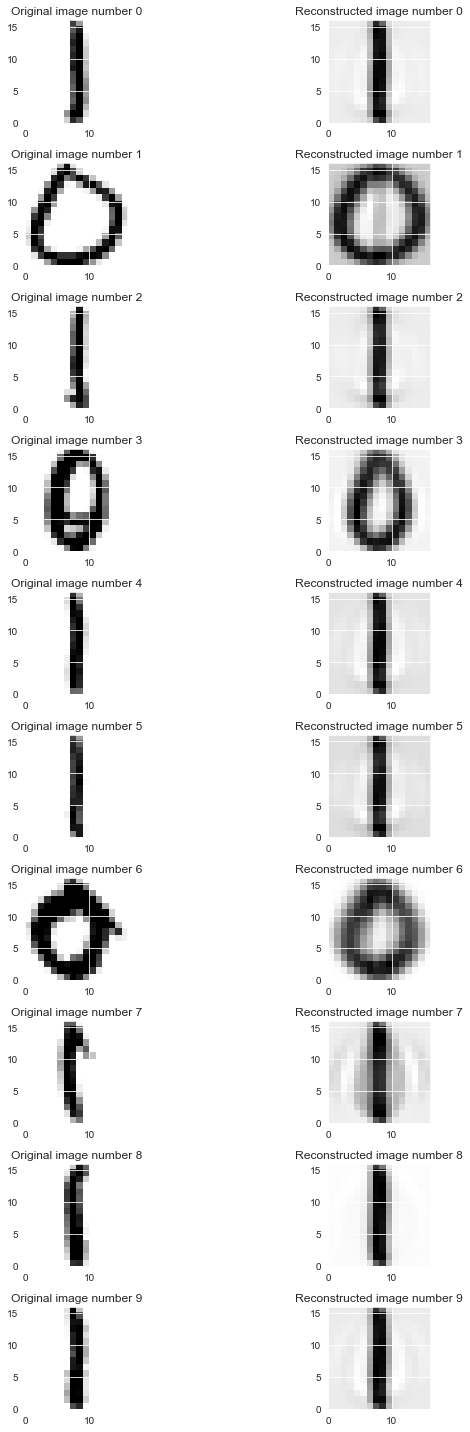

Figure 5: First 10 digits and their reconstructed counterparts


In [32]:
fig,ax = plt.subplots(10,2,figsize=(10,20))
ax = ax.ravel()
for i in range(0,10):
    I = reshape(W[i,:],(16,16))
    O = reshape(X[i,:],(16,16))
    ax[2*i].imshow(O, extent=(0,16,0,16), cmap=cm.gray_r);
    ax[2*i].set_title(f'Original image number {i}')
    ax[2*i+1].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    ax[2*i+1].set_title(f'Reconstructed image number {i}')
plt.tight_layout()
plt.show()
print('Figure 5: First 10 digits and their reconstructed counterparts')

Despite we have only used the first 4 PCs, the reconstructed images maintain the original pattern of the data. The difference between them lies mainly in the background, while the digits inside the illustrations are perfectly recognizable.
As a matter of fact, these PCs are the ones that explain most of the variance within the original attributes, as we will see at the point number 7.

Moreover it's possibile to see the shapes of the two numbers in every image, i.e. zero shape in images of ones and viceversa.
The reason lies in the fact that the Principal components we have used to construct the W matrix are linear combinations of the original variables.

5) Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in  𝑍 ) against each other. You can leave the diagonal blank. Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.

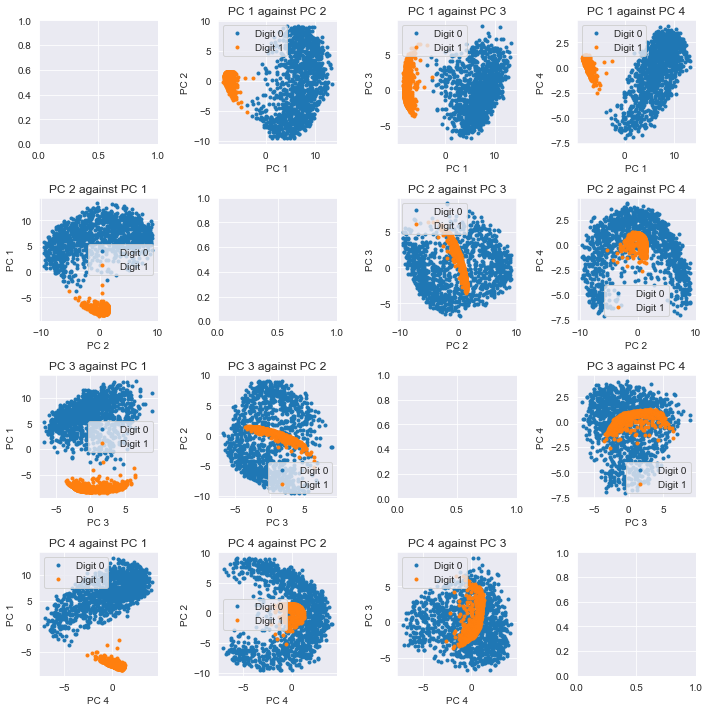

Figure 6: Plots of each possible combination between the first four PCs


In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style("darkgrid")
fig,ax = plt.subplots(4,4,figsize=(10,10))# create 12 rows of 2 columns of subplots

for i in range(0,4):
    for j in range(0,4):
        if i == j:
            pass
        else:
            ax[i][j].plot(Z[y == 0,i], Z[y == 0,j],'.', label = 'Digit 0')
            ax[i][j].plot(Z[y == 1, i], Z[y == 1,j],'.', label = 'Digit 1')
            ax[i][j].set_xlabel(f'PC {i+1}')
            ax[i][j].set_ylabel(f'PC {j+1}')
            ax[i][j].set_title(f'PC {i+1} against PC {j+1}')
            ax[i][j].legend()

plt.tight_layout()
plt.show()
print('Figure 6: Plots of each possible combination between the first four PCs')

6) Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in  𝑍 ). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.

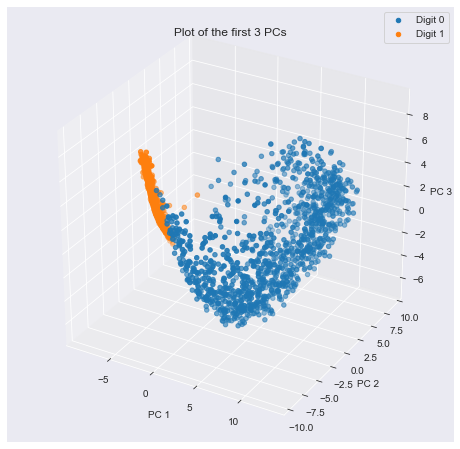

Figure 7: 3D plot of the first three Principal Components


In [34]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Z[y == 0,0], Z[y == 0,1], Z[y == 0,2], '.', label = 'Digit 0')
ax.scatter(Z[y == 1,0], Z[y == 1,1], Z[y == 1,2], '.', label = 'Digit 1')
ax.legend()
ax.set_title('Plot of the first 3 PCs')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()
print('Figure 7: 3D plot of the first three Principal Components')

7) What can you conclude from the various scatterplots about the PCs and the way they separate the data?

Percentage of explained variance by the first 4 PCs

In [35]:
rho =  [0,0,0,0]
S = sum(s*s)

for i in range(0,4):
    
    rho[i] = ((s[i]*s[i])/S) *100
    
rho

[47.931246072533625, 13.42461339240098, 6.3231201026328385, 3.448341779704118]

The first 4 PCs can only catch roughly 70% of total variance in the data.
As we can observe from the graphs before, in fact, only when the first PC is represented there is evident separation between the two class labels. (As a matter of fact it can explain the highest percentage of variance among the PCs considered).
Conversely when we show the scatter plots of each possible combination projection onto only PC2 to PC4, the data are not well separeted and we can recognise the digit class only due to the different colors.
This thesis is proved also representing the first 3 PC in the 3D scatter plot.
The presence of PC1 leads to a recognizable separation pattern.

## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

### Answer to question 2.3

### I

In [36]:
pop = np.array([2,3,6,8,11,18])

m = np.mean(pop)
std = np.std(pop)
print(f'Mean: {m} \nStand. Dev.: {std}')

Mean: 8.0 
Stand. Dev.: 5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

### II

List of all possible samples of two aliens without replacement and their means

In [37]:
import itertools as it

twopl = np.asarray(list(it.combinations(pop,2)))
for i in range(0,15):
    mean = np.mean(twopl[i])
    print(f'{twopl[i]} mean: {mean}')

[2 3] mean: 2.5
[2 6] mean: 4.0
[2 8] mean: 5.0
[ 2 11] mean: 6.5
[ 2 18] mean: 10.0
[3 6] mean: 4.5
[3 8] mean: 5.5
[ 3 11] mean: 7.0
[ 3 18] mean: 10.5
[6 8] mean: 7.0
[ 6 11] mean: 8.5
[ 6 18] mean: 12.0
[ 8 11] mean: 9.5
[ 8 18] mean: 13.0
[11 18] mean: 14.5


List of all possible samples of four aliens without replacement and their means

In [38]:
fourpl = np.asarray(list(it.combinations(pop,4)))
for i in range(0,15):
    mean = np.mean(fourpl[i])
    print(f'{fourpl[i]} mean: {mean}')

[2 3 6 8] mean: 4.75
[ 2  3  6 11] mean: 5.5
[ 2  3  6 18] mean: 7.25
[ 2  3  8 11] mean: 6.0
[ 2  3  8 18] mean: 7.75
[ 2  3 11 18] mean: 8.5
[ 2  6  8 11] mean: 6.75
[ 2  6  8 18] mean: 8.5
[ 2  6 11 18] mean: 9.25
[ 2  8 11 18] mean: 9.75
[ 3  6  8 11] mean: 7.0
[ 3  6  8 18] mean: 8.75
[ 3  6 11 18] mean: 9.5
[ 3  8 11 18] mean: 10.0
[ 6  8 11 18] mean: 10.75


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

### III

N = 2 sample

In [39]:
m2x = np.zeros(15)
for i in range(0,15):
    m2x[i] = np.mean(twopl[i])
    
m = np.mean(m2x)
std = np.std(m2x)
print(f'Mean: {m} \nStand. Dev.: {std}')

Mean: 8.0 
Stand. Dev.: 3.40587727318528


N = 4 sample

In [40]:
m4x = np.zeros(15)
for i in range(0,15):
    m4x[i] = np.mean(fourpl[i])
    
m = np.mean(m4x)
std = np.std(m4x)
print(f'Mean: {m} \nStand. Dev.: {std}')

Mean: 8.0 
Stand. Dev.: 1.70293863659264


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

### IV

##### 1)
The population has a mean of 8, which is the same value reached for the means of the two previous samples.
This result confirms the statement of the Central Limit Theorem, in fact when n gets larger (more precisely when n gets close to the population size), the distribution of the difference between the sample average and population mean approximates the normal distribution with mean 0 and variance $\sigma^2$.

##### 2)
#### For N = 2:

In [41]:
print(f'sigma_x = {np.std(m2x)} and sigma/sqrt(2) = {np.std(pop)/np.sqrt(2)}')

sigma_x = 3.40587727318528 and sigma/sqrt(2) = 3.807886552931954


Which confirms that $\sigma_x \approx \sigma/\sqrt{N}$.

If we consider a better approximation,

In [42]:
np.std(pop)/np.sqrt(2) * np.sqrt((6-2)/(6-1))

3.40587727318528

Then, $\sigma_x = \sigma / \sqrt{2} \times \sqrt{(6-2)/(6-1)}$.

#### For N = 4:

In [43]:
print(f'sigma_x = {np.std(m4x)} and sigma/sqrt(4) = {np.std(pop)/np.sqrt(4)}')

sigma_x = 1.70293863659264 and sigma/sqrt(4) = 2.692582403567252


Or better,

In [44]:
np.std(pop)/np.sqrt(4) * np.sqrt((6-4)/(6-1))

1.70293863659264

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

### V

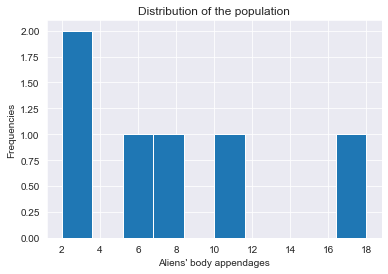

Figure 8: Distribution of the initial population of Aliens


In [45]:
plt.hist(pop)
plt.xlabel('Aliens\' body appendages')
plt.ylabel('Frequencies')
plt.title('Distribution of the population')
plt.show()
print('Figure 8: Distribution of the initial population of Aliens')

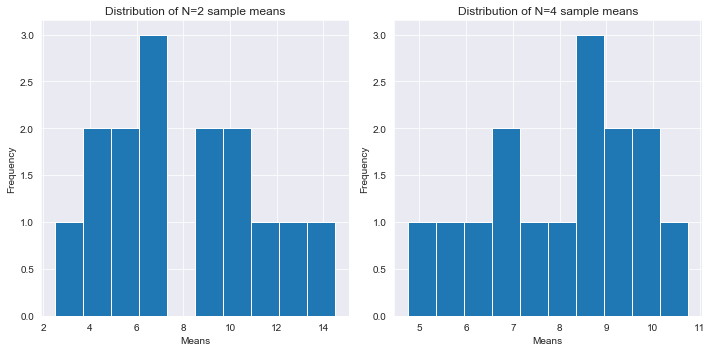

Figure 9: Distribution of sample means for N=2 and N=4


In [46]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.ravel()

ax[0].hist(m2x)
ax[0].set_title('Distribution of N=2 sample means')
ax[0].set_xlabel('Means')
ax[0].set_ylabel('Frequency')

ax[1].hist(m4x)
ax[1].set_title('Distribution of N=4 sample means')
ax[1].set_xlabel('Means')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
print('Figure 9: Distribution of sample means for N=2 and N=4')

From the two histograms above we can see that increasing the sample size, the width (i.e. Standard Deviation) of the distribution is getting gradually smaller. So bigger samples seem to give tighter, more accurate estimates. In fact, while the means represented in the left plot ranges from 2 to 14, the x axis of the right one is from 5 to 11. That's because the distribution of the mean calculated on a sample of larger size tend to assume a normal distribution with values closer to $\mu = 8$, mean of the initial population, and variance $\frac{\sigma^2}{n}$ due to the Central Limit Theorem.